In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing
import pandas_profiling

Link to dataset: 
https://www.kaggle.com/dipam7/student-grade-prediction

In [2]:
data = pd.read_csv('../data/student-mat_cleaned.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      357 non-null    object
 1   sex         357 non-null    object
 2   age         357 non-null    int64 
 3   address     357 non-null    object
 4   famsize     357 non-null    object
 5   Pstatus     357 non-null    object
 6   Medu        357 non-null    int64 
 7   Fedu        357 non-null    int64 
 8   Mjob        357 non-null    object
 9   Fjob        357 non-null    object
 10  reason      357 non-null    object
 11  guardian    357 non-null    object
 12  traveltime  357 non-null    int64 
 13  studytime   357 non-null    int64 
 14  failures    357 non-null    int64 
 15  schoolsup   357 non-null    object
 16  famsup      357 non-null    object
 17  paid        357 non-null    object
 18  activities  357 non-null    object
 19  nursery     357 non-null    object
 20  higher    

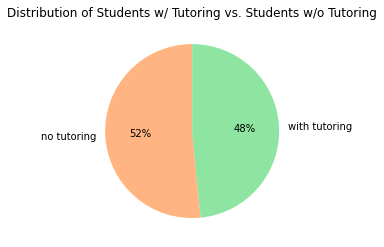

In [4]:
#Distribution of Students w/ Tutoring vs. Students w/o Tutoring
paid_dist = data.paid.value_counts()
plt.pie(x=[paid_dist[0], paid_dist[1]], labels=['no tutoring', 'with tutoring'], autopct='%.0f%%', startangle=90,
        colors = sns.color_palette('pastel')[1:3])
plt.title('Distribution of Students w/ Tutoring vs. Students w/o Tutoring')
plt.show()

We can see from the above pie chart that the distribution of students with tutoring and without tutoring are approximately evenly distributed.

As such, we can then compare the student data between those taking paid tutoring vs those not taking paid tutoring.

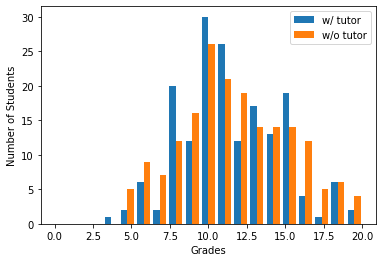

In [5]:
tutored = data[data.paid == 'yes']
not_tutored = data[data.paid == 'no']

bins = np.linspace(0, 20, 20)
plt.hist([tutored.G3, not_tutored.G3], bins=bins, alpha=1, label=['w/ tutor', 'w/o tutor'])
plt.legend(loc='upper right')
plt.xlabel('Grades')
plt.ylabel('Number of Students')
plt.show()

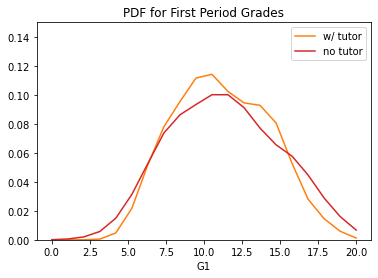

In [6]:
import scipy.stats as stats

density1 = stats.gaussian_kde(tutored.G1)
n1, x1, _ = plt.hist(tutored.G1, bins=bins, histtype='step', alpha=0, density=True)
plt.plot(x1, density1(x1), label='w/ tutor')
density2 = stats.gaussian_kde(not_tutored.G1)
n2, x2, _ = plt.hist(not_tutored.G1, bins=bins, histtype='step', alpha=0, density=True)
plt.plot(x2, density2(x2), label='no tutor')

plt.legend(loc='upper right')
plt.xlabel('G1')
plt.title('PDF for First Period Grades')
plt.show()

From the PDF distribution, we can see that students with tutoring are more likely to achieve a grade within the 7.0 to 16.0 grade range (which ranges from average to above average) than students who have not taken paid tutoring.

We can also see that students without tutoring are more likely to achieve a grade lower than 7.0 (below average) than students with tutoring.

From those trends, we can infer that students with tutoring are more likely to perform better on average than students without tutoring.

However, over the 16.0 grade range, it appears that students without tutoring are more likely to perform better than students with tutoring, which may contradict our inference. But that can be explained by the fact that students achieving those high grades may not need or seek out tutoring.

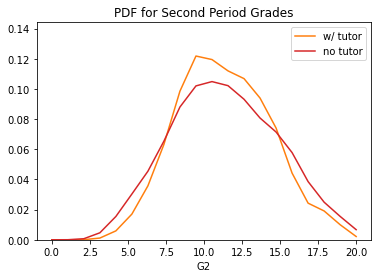

In [7]:
density1 = stats.gaussian_kde(tutored.G2)
n1, x1, _ = plt.hist(tutored.G2, bins=bins, histtype='step', alpha=0, density=True)
plt.plot(x1, density1(x1), label='w/ tutor')
density2 = stats.gaussian_kde(not_tutored.G2)
n2, x2, _ = plt.hist(not_tutored.G2, bins=bins, histtype='step', alpha=0, density=True)
plt.plot(x2, density2(x2), label='no tutor')

plt.legend(loc='upper right')
plt.xlabel('G2')
plt.title('PDF for Second Period Grades')
plt.show()

This produces similar results with the first period grades PDF.

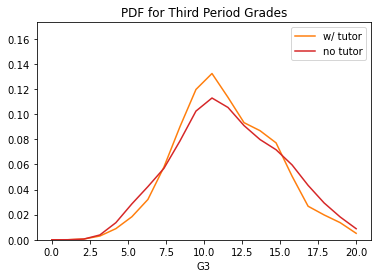

In [8]:
density1 = stats.gaussian_kde(tutored.G3)
n1, x1, _ = plt.hist(tutored.G3, bins=bins, histtype='step', alpha=0, density=True)
plt.plot(x1, density1(x1), label='w/ tutor')
density2 = stats.gaussian_kde(not_tutored.G3)
n2, x2, _ = plt.hist(not_tutored.G3, bins=bins, histtype='step', alpha=0, density=True)
plt.plot(x2, density2(x2), label='no tutor')

plt.legend(loc='upper right')
plt.xlabel('G3')
plt.title('PDF for Third Period Grades')
plt.show()

This also produces similar results with the first and second period grades PDF.

Overall, from these three graphs, we can infer that students with tutoring are overall more likely to perform better on average than students without tutoring, outside of those who are already performing spectacularly.